            Timestamp    CO2  Temperature  Humidity  Pressure
0 2024-08-28 19:12:21  532.0        100.0      48.9     983.9
1 2024-08-28 19:22:21  532.0        100.0      48.9     983.8
2 2024-08-28 19:32:21  535.0        100.0      48.9     983.6
3 2024-08-28 19:42:21  534.0        100.0      49.0     983.5
4 2024-08-28 19:52:21  531.0        100.0      48.9     983.4


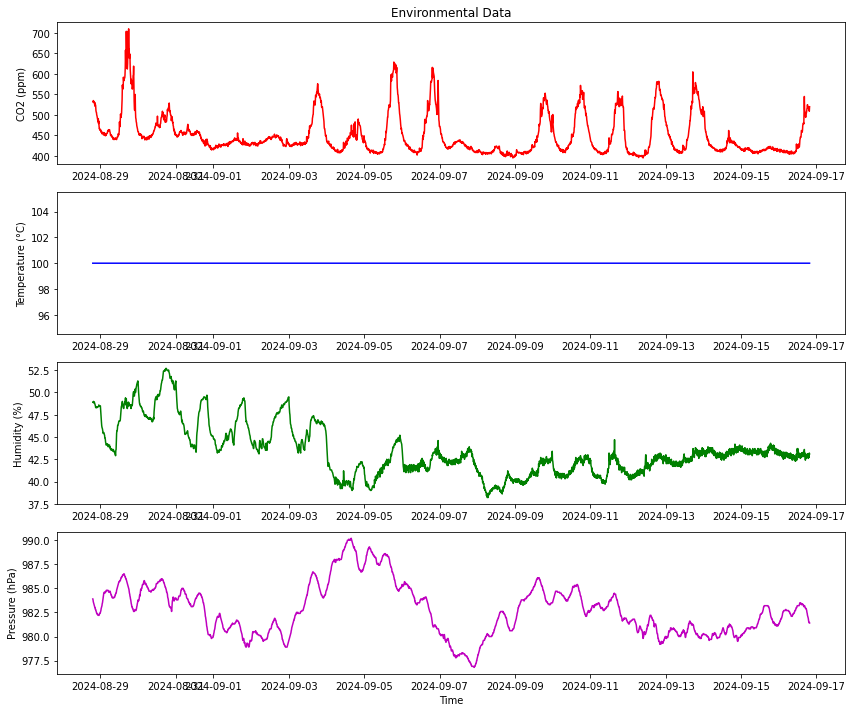

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# ThingSpeak API URL setup
channel_id = '2027273'
read_api_key = 'XHA11H2XAGGWMDY1'
num_results = 2700

# Construct the API URL and Make the HTTP GET request
url = f'https://api.thingspeak.com/channels/{channel_id}/feeds.json?results={num_results}&api_key={read_api_key}'
response = requests.get(url)
data = response.json()

# Parse data from feeds
feeds = data['feeds']
timestamps = [datetime.strptime(feed['created_at'], '%Y-%m-%dT%H:%M:%SZ') for feed in feeds]
co2_values = [float(feed['field4']) for feed in feeds]
temperature_values = [float(feed['field1']) for feed in feeds]
humidity_values = [float(feed['field6']) for feed in feeds]
pressure_values = [float(feed['field7']) for feed in feeds]

# Create a DataFrame from the parsed data
df = pd.DataFrame({
    'Timestamp': timestamps,
    'CO2': co2_values,
    'Temperature': temperature_values,
    'Humidity': humidity_values,
    'Pressure': pressure_values
})

# Save the DataFrame to a CSV file
df.to_csv('environmental_data.csv', index=False)

# Print the first few rows of the DataFrame for verification
print(df.head())

# Plotting the data
plt.figure(figsize=(12, 10))

# CO2 Plot
plt.subplot(4, 1, 1)
plt.plot(df['Timestamp'], df['CO2'], 'r-')
plt.ylabel('CO2 (ppm)')
plt.title('Environmental Data')

# Temperature Plot
plt.subplot(4, 1, 2)
plt.plot(df['Timestamp'], df['Temperature'], 'b-')
plt.ylabel('Temperature (°C)')

# Humidity Plot
plt.subplot(4, 1, 3)
plt.plot(df['Timestamp'], df['Humidity'], 'g-')
plt.ylabel('Humidity (%)')

# Pressure Plot
plt.subplot(4, 1, 4)
plt.plot(df['Timestamp'], df['Pressure'], 'm-')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Time')

plt.tight_layout()
plt.show()


In [3]:
import os
import requests
from bs4 import BeautifulSoup

# Step 1: Fetch data from the website
url = 'https://asdl-iot.github.io/ASDL-IOT/Kendeda_AQ.html'

# Get data from the website
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all script tags
scripts = soup.find_all('script')

# Set the path to the desktop
# os.getcwd() is for jupyter notebook. You can use os.path.dirname(os.path.abspath(__file__)) is you are running a script
desktop_path = os.path.join(os.getcwd(), "scripts_content.txt")

# Save the content of each script tag to a file
with open(desktop_path, 'w', encoding='utf-8') as file:
    for script in scripts:
        file.write(script.text + '\n\n')

print(f"The content of the script tags has been saved to '{desktop_path}'.")

The content of the script tags has been saved to 'e:\forSDE\IoT-dev\data-playground\scripts_content.txt'.


Common Date Range: 2024-07-19 01:43:18+00:00 to 2024-09-16 19:41:35+00:00
Total Days: 59 days


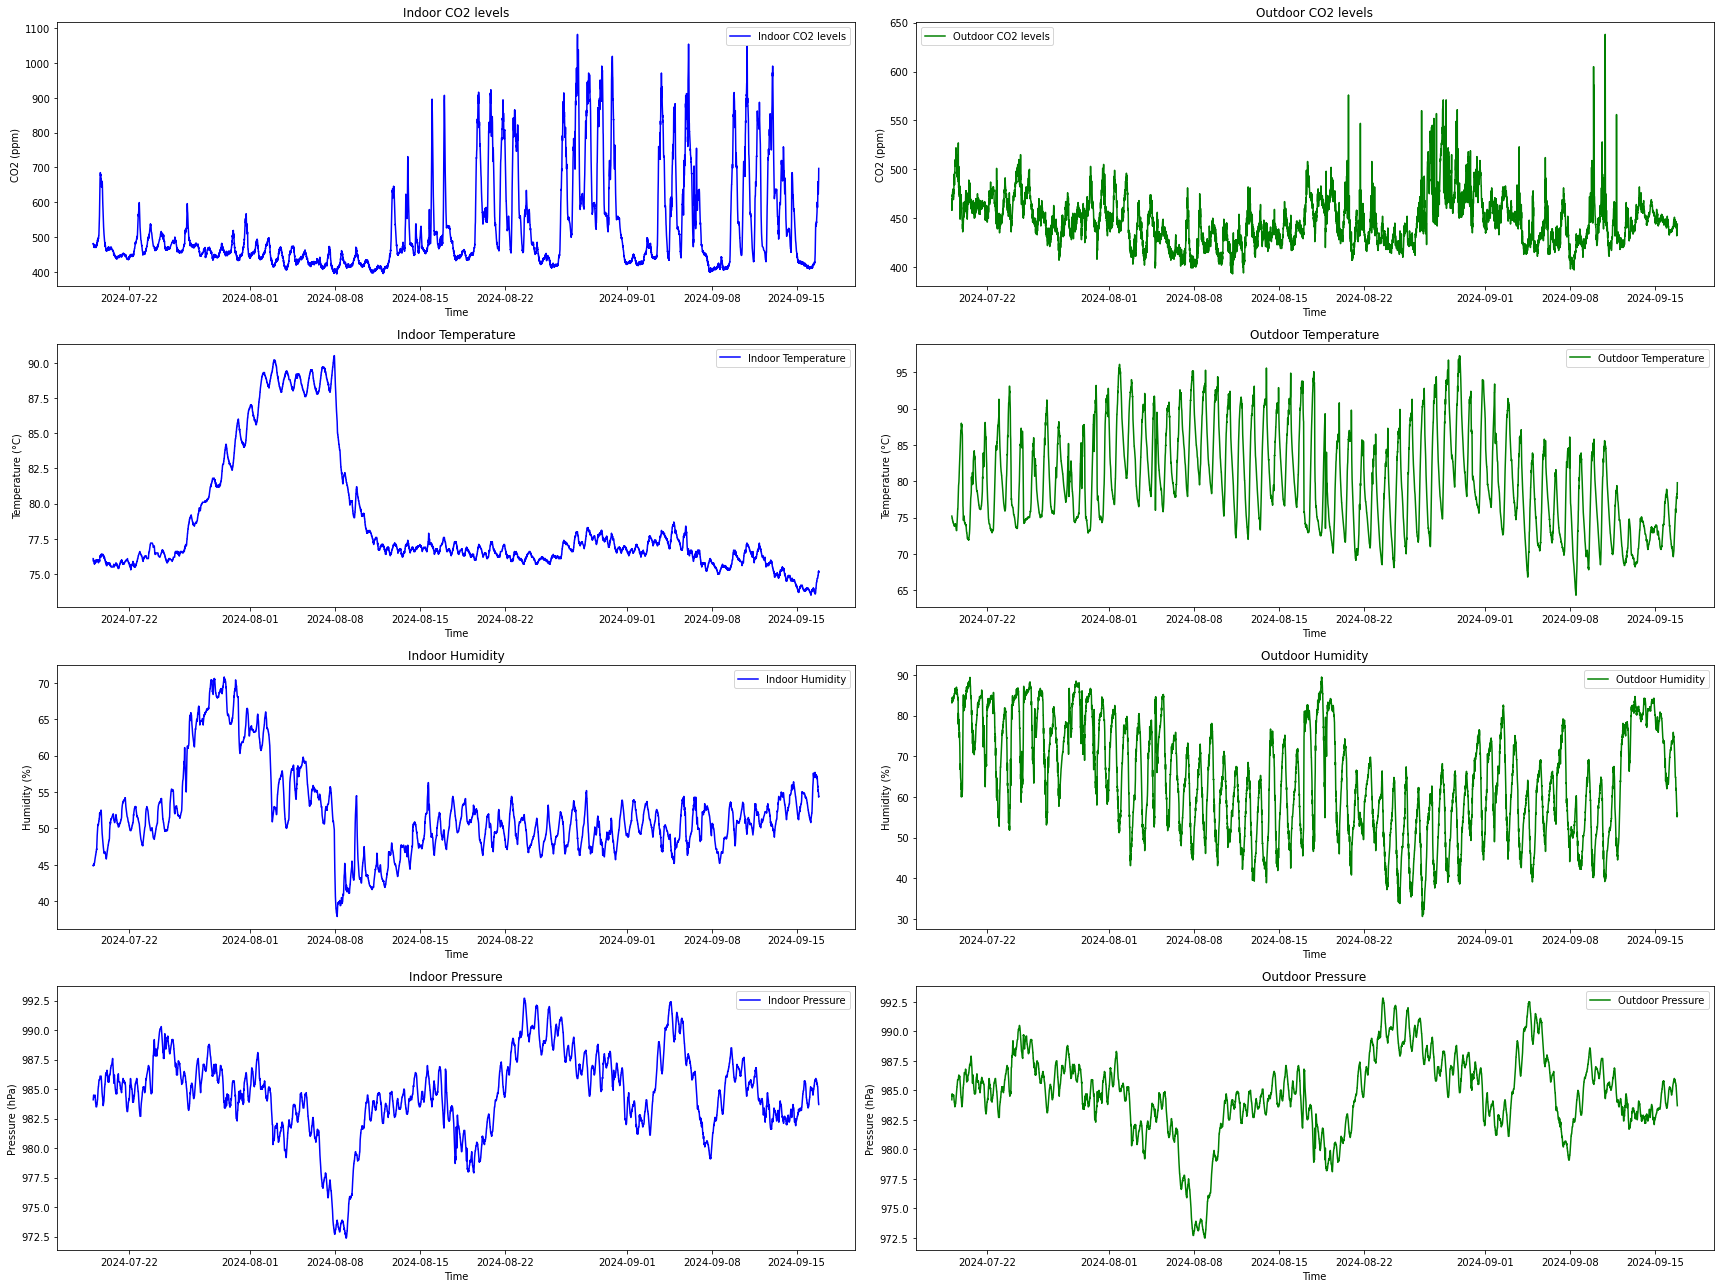

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def fetch_data(channel_id, field):
    url = f"https://api.thingspeak.com/channels/{channel_id}/fields/{field}.json?results=8000"
    response = requests.get(url)
    data = response.json()
    feeds = data['feeds']
    df = pd.DataFrame(feeds)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['value'] = pd.to_numeric(df['field' + str(field)], errors='coerce')
    df.dropna()
    return df

# Fetch data
indoor_channel_id = '2580816'
outdoor_channel_id = '2099116'

# Fields to fetch (CO2, Temperature, Humidity, Pressure)
fields = [4, 5, 6, 7]
indoor_data = {}
outdoor_data = {}

for field in fields:
    indoor_data[field] = fetch_data(indoor_channel_id, field)
    outdoor_data[field] = fetch_data(outdoor_channel_id, field)

# Set common date range
start_date = max(indoor_data[4]['created_at'].min(), outdoor_data[4]['created_at'].min())
end_date = min(indoor_data[4]['created_at'].max(), outdoor_data[4]['created_at'].max())

# Trim data to common date range
for field in fields:
    indoor_data[field] = indoor_data[field][(indoor_data[field]['created_at'] >= start_date) & (indoor_data[field]['created_at'] <= end_date)]
    outdoor_data[field] = outdoor_data[field][(outdoor_data[field]['created_at'] >= start_date) & (outdoor_data[field]['created_at'] <= end_date)]

print(f"Common Date Range: {start_date} to {end_date}")
print(f"Total Days: {(end_date - start_date).days} days")

# Plotting
fig, axs = plt.subplots(4, 2, figsize=(24, 18))

titles = ['CO2 levels', 'Temperature', 'Humidity', 'Pressure']
y_labels = ['CO2 (ppm)', 'Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)']

for i, field in enumerate(fields):
    # Indoor data plot
    axs[i, 0].plot(indoor_data[field]['created_at'], indoor_data[field]['value'], label=f'Indoor {titles[i]}', color='blue')
    axs[i, 0].set_title(f'Indoor {titles[i]}')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel(y_labels[i])
    axs[i, 0].legend()

    # Outdoor data plot
    axs[i, 1].plot(outdoor_data[field]['created_at'], outdoor_data[field]['value'], label=f'Outdoor {titles[i]}', color='green')
    axs[i, 1].set_title(f'Outdoor {titles[i]}')
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel(y_labels[i])
    axs[i, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


Common Date Range: 2024-07-19 01:43:18+00:00 to 2024-09-16 19:41:35+00:00
Total Days: 59 days


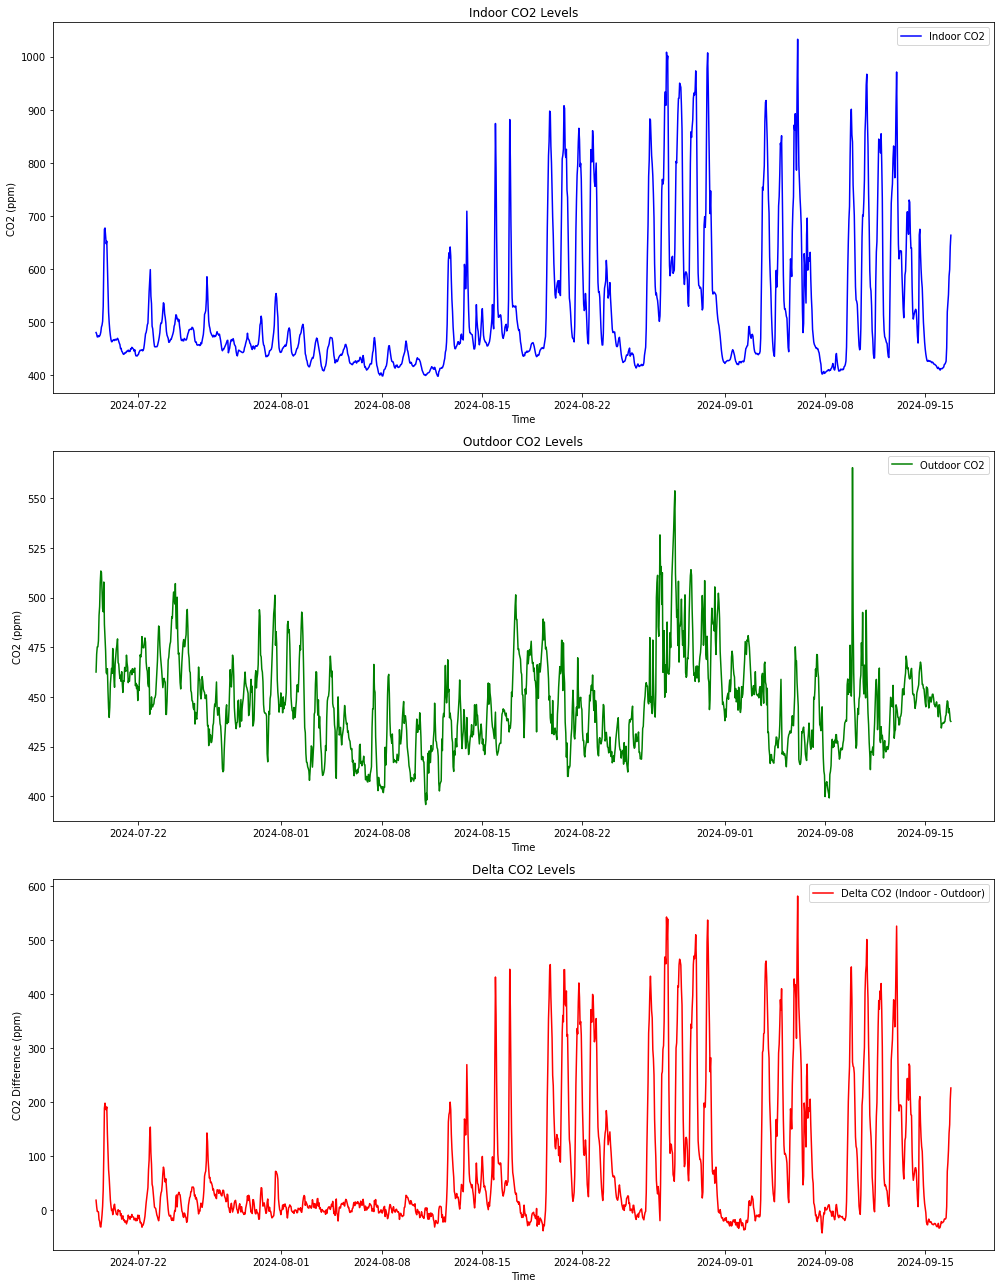

In [8]:
# Fetch data from channels
indoor_channel_id = '2580816'
outdoor_channel_id = '2099116'
fields = [4, 5, 6, 7]
indoor_data = {}
outdoor_data = {}

for field in fields:
    indoor_data[field] = fetch_data(indoor_channel_id, field)
    outdoor_data[field] = fetch_data(outdoor_channel_id, field)

# Set common date range
start_date = max(indoor_data[4]['created_at'].min(), outdoor_data[4]['created_at'].min())
end_date = min(indoor_data[4]['created_at'].max(), outdoor_data[4]['created_at'].max())

# Trim data to common date range
for field in fields:
    indoor_data[field] = indoor_data[field][(indoor_data[field]['created_at'] >= start_date) & (indoor_data[field]['created_at'] <= end_date)]
    outdoor_data[field] = outdoor_data[field][(outdoor_data[field]['created_at'] >= start_date) & (outdoor_data[field]['created_at'] <= end_date)]

print(f"Common Date Range: {start_date} to {end_date}")
print(f"Total Days: {(end_date - start_date).days} days")

# Resample and interpolate data to match time intervals
indoor_data_resampled = indoor_data[4].set_index('created_at').resample('1h').mean(numeric_only=True).interpolate().reset_index()
outdoor_data_resampled = outdoor_data[4].set_index('created_at').resample('1h').mean(numeric_only=True).interpolate().reset_index()

# Merge indoor and outdoor data based on time
merged_data = pd.merge(indoor_data_resampled, outdoor_data_resampled, on='created_at', suffixes=('_indoor', '_outdoor'))

# Calculate delta values
merged_data['delta'] = merged_data['value_indoor'] - merged_data['value_outdoor']

# Plot data
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot Indoor CO2 data
axs[0].plot(indoor_data_resampled['created_at'], indoor_data_resampled['value'], label='Indoor CO2', color='blue')
axs[0].set_title('Indoor CO2 Levels')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('CO2 (ppm)')
axs[0].legend()

# Plot Outdoor CO2 data
axs[1].plot(outdoor_data_resampled['created_at'], outdoor_data_resampled['value'], label='Outdoor CO2', color='green')
axs[1].set_title('Outdoor CO2 Levels')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('CO2 (ppm)')
axs[1].legend()

# Plot Delta CO2 data
axs[2].plot(merged_data['created_at'], merged_data['delta'], label='Delta CO2 (Indoor - Outdoor)', color='red')
axs[2].set_title('Delta CO2 Levels')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('CO2 Difference (ppm)')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()
